In [23]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
df = pd.read_csv("/content/EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [25]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [26]:
df.isnull().sum()


,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [27]:
df = df.dropna()

In [28]:
Q1 = df['Balance'].quantile(0.25)
Q3 = df['Balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Balance'] >= lower_bound) & (df['Balance'] <= upper_bound)]

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles', 'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12', 'Days_since_enroll']  # List of numerical features to scale
df[numerical_features] = scaler.fit_transform(df[numerical_features])

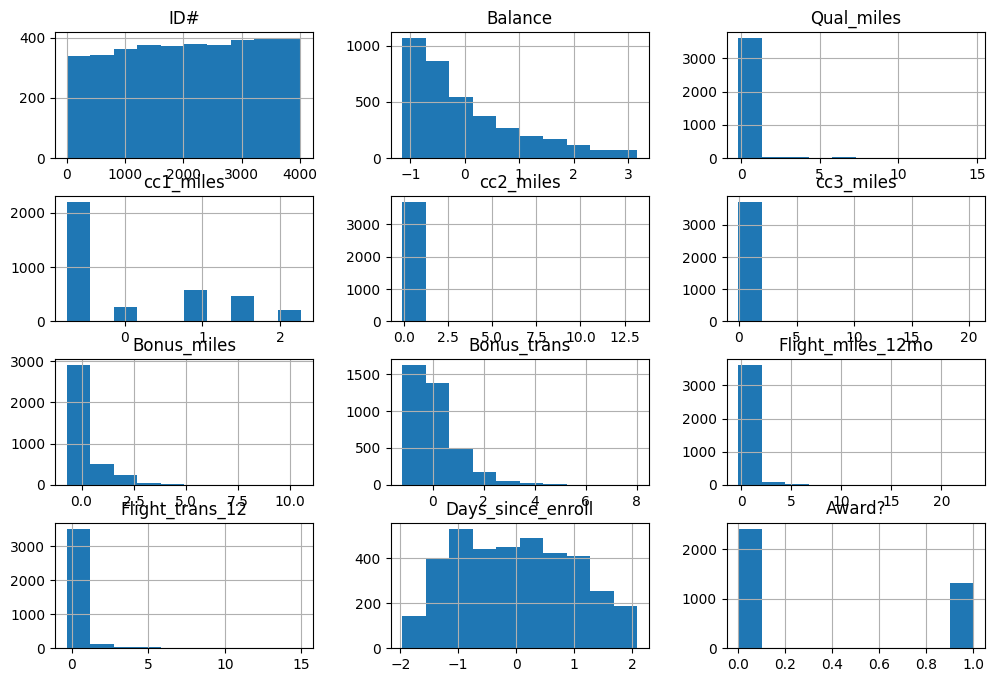

In [30]:
df.hist(figsize=(12, 8))
plt.show()

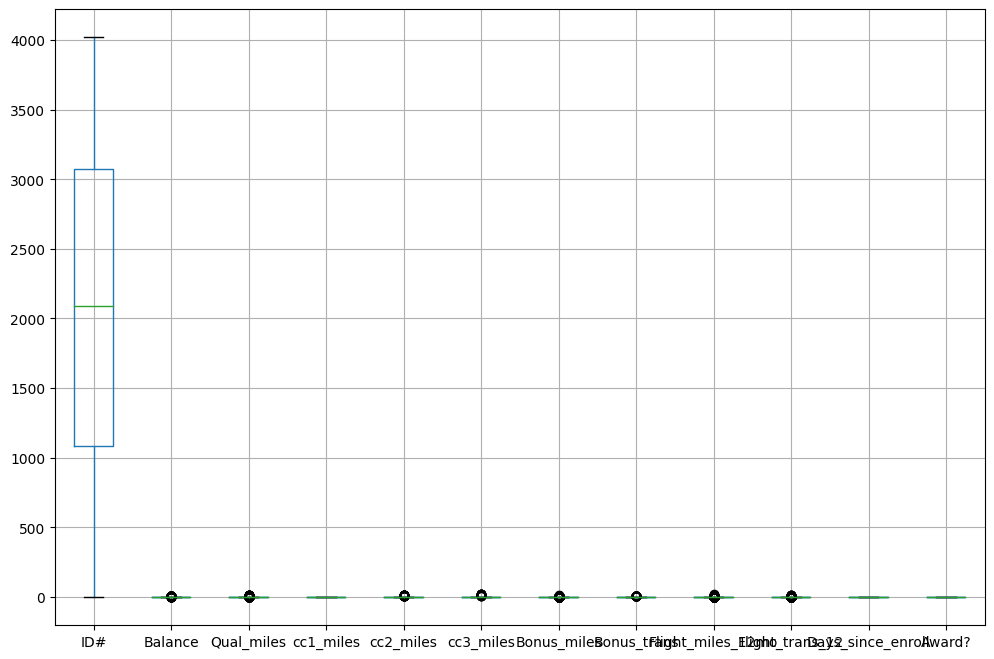

In [31]:
df.boxplot(figsize=(12, 8))
plt.show()

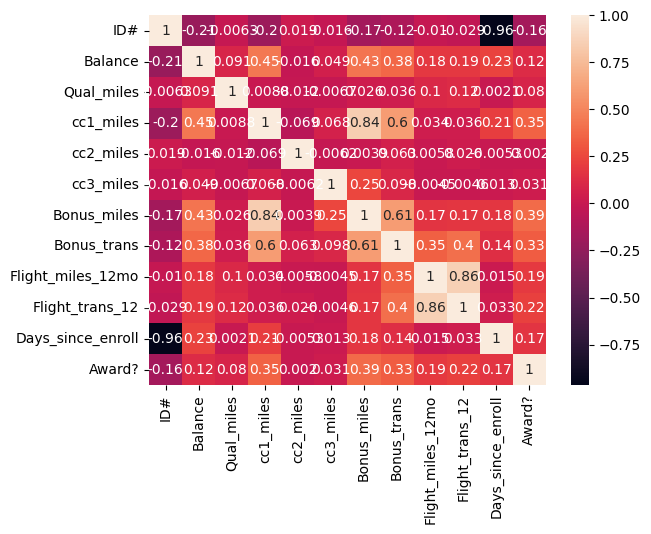

In [32]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

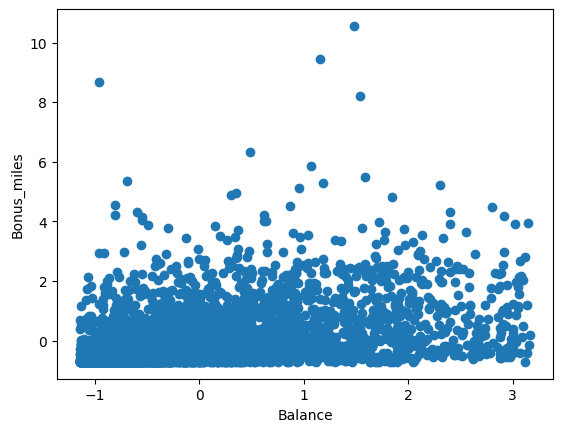

In [33]:
plt.scatter(df['Balance'], df['Bonus_miles'])
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.show()

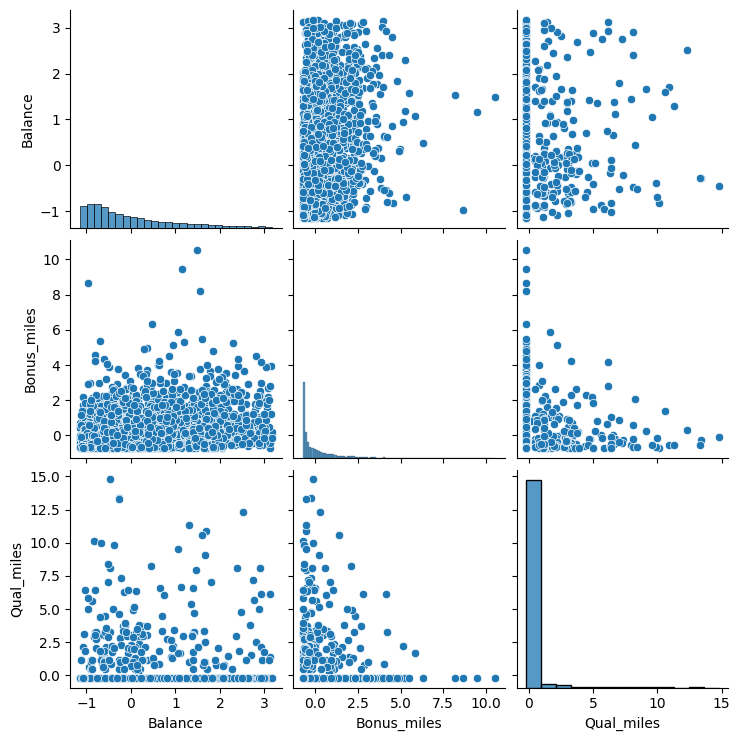

In [34]:
sns.pairplot(df[['Balance', 'Bonus_miles', 'Qual_miles']])
plt.show()

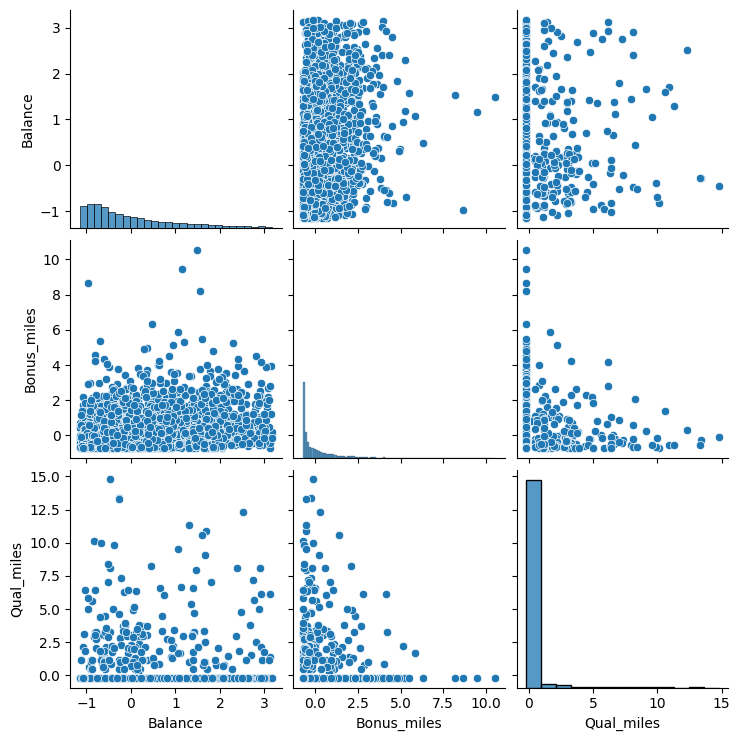

In [35]:
sns.pairplot(df[['Balance', 'Bonus_miles', 'Qual_miles']])
plt.show()

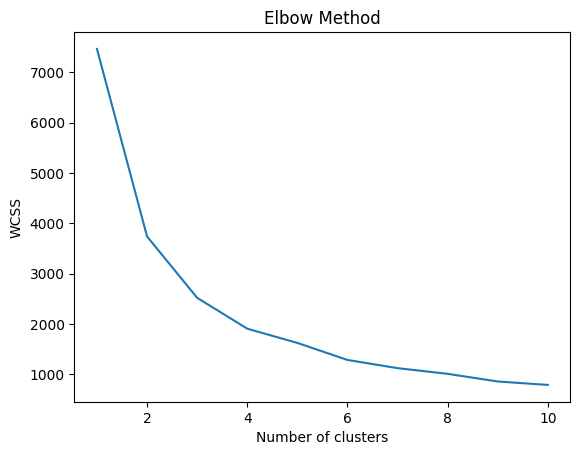

In [37]:
from sklearn.cluster import KMeans
X = df[['Balance', 'Bonus_miles']]
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [39]:
from sklearn.cluster import AgglomerativeClustering
X = df[['Balance', 'Bonus_miles']]
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['hierarchical_cluster'] = hierarchical_cluster.fit_predict(X)

In [40]:
from sklearn.cluster import DBSCAN
X = df[['Balance', 'Bonus_miles']]
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X)

In [41]:

X = df[['Balance', 'Bonus_miles']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(X)
print(df['kmeans_cluster'].value_counts())


kmeans_cluster
1    2531
2     700
0     502
Name: count, dtype: int64


In [45]:
from sklearn.cluster import AgglomerativeClustering
X = df[['Balance', 'Bonus_miles']]
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
df['hierarchical_cluster'] = hierarchical_cluster.fit_predict(X)
print(df['hierarchical_cluster'].value_counts())


hierarchical_cluster
0    2782
2     601
1     350
Name: count, dtype: int64


In [49]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X = df[['Balance', 'Bonus_miles']]

linkage_methods = ['ward', 'complete', 'average', 'single']
silhouette_scores = []

for linkage in linkage_methods:
    hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage=linkage)
    cluster_labels = hierarchical_cluster.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
print(f"Silhouette scores for different linkage methods: {silhouette_scores}")

best_linkage = linkage_methods[silhouette_scores.index(max(silhouette_scores))]
print(f"Best linkage method: {best_linkage}")

Silhouette scores for different linkage methods: [0.4982719517176774, 0.6544262098060324, 0.6608895323569701, 0.8117163537693827]
Best linkage method: single


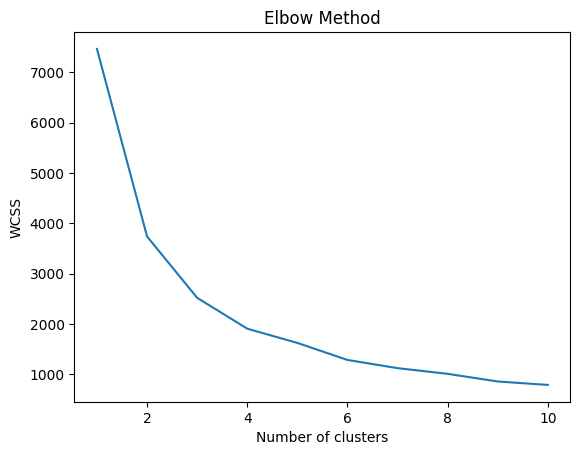

In [50]:
from sklearn.cluster import KMeans

X = df[['Balance', 'Bonus_miles']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [51]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = df[['Balance', 'Bonus_miles']]
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]
silhouette_scores = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X)
        if len(set(cluster_labels)) > 1:
            silhouette_scores.append((eps, min_samples, silhouette_score(X, cluster_labels)))
print(f"Silhouette scores for different DBSCAN parameters: {silhouette_scores}")
best_params = max(silhouette_scores, key=lambda item: item[2])
print(f"Best eps: {best_params[0]}, best min_samples: {best_params[1]}")

Silhouette scores for different DBSCAN parameters: [(0.3, 3, 0.4934799665477871), (0.3, 5, 0.6160868075848452), (0.3, 7, 0.654575360614404), (0.5, 3, 0.6865197117482391), (0.5, 5, 0.7304625128748536), (0.5, 7, 0.6228395680434926), (0.7, 3, 0.7778176749860992), (0.7, 5, 0.7675843178104672), (0.7, 7, 0.7623869497364169)]
Best eps: 0.7, best min_samples: 3


Cluster 1:
           Balance  Bonus_miles   Qual_miles
count  2531.000000  2531.000000  2531.000000
mean     -0.542811    -0.411496    -0.045211
std       0.416344     0.401870     0.873995
min      -1.147029    -0.718521    -0.175597
25%      -0.890252    -0.700943    -0.175597
50%      -0.623310    -0.589616    -0.175597
75%      -0.260804    -0.269250    -0.175597
max       0.561286     1.350063    14.765868
Cluster 0:
          Balance  Bonus_miles  Qual_miles
count  502.000000   502.000000  502.000000
mean     0.739006     2.024849    0.035524
std      0.962043     1.132472    0.958712
min     -1.077396     0.756300   -0.175597
25%      0.051747     1.297224   -0.175597
50%      0.584586     1.768374   -0.175597
75%      1.421469     2.380160   -0.175597
max      3.143172    10.556929   10.572125
Cluster 2:
          Balance  Bonus_miles  Qual_miles
count  700.000000   700.000000  700.000000
mean     1.432676     0.035745    0.137994
std      0.731531     0.527100    1.374609
min

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

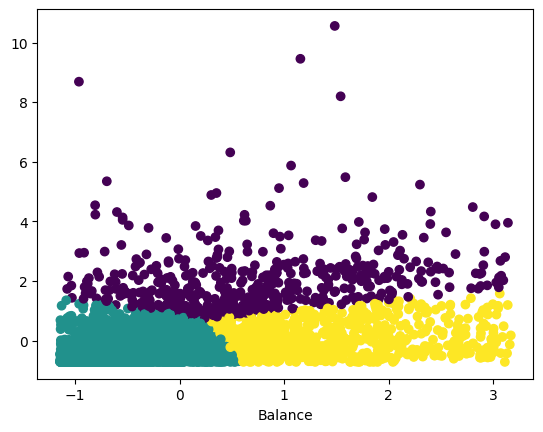

In [52]:
for cluster in df['kmeans_cluster'].unique():
    cluster_data = df[df['kmeans_cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data[['Balance', 'Bonus_miles', 'Qual_miles']].describe())
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['kmeans_cluster'])
plt.xlabel('Balance')
plt

Cluster 0:
           Balance  Bonus_miles   Qual_miles
count  2782.000000  2782.000000  2782.000000
mean     -0.489040    -0.256509    -0.045713
std       0.454043     0.646411     0.849217
min      -1.147029    -0.718521    -0.175597
25%      -0.869146    -0.695084    -0.175597
50%      -0.588515    -0.554460    -0.175597
75%      -0.162927    -0.041685    -0.175597
max       0.944333     3.206118    14.765868
Cluster 1:
          Balance  Bonus_miles  Qual_miles
count  350.000000   350.000000  350.000000
mean     1.369441     2.195065    0.094918
std      0.783663     1.284739    1.179638
min     -0.964700     0.538192   -0.175597
25%      0.834556     1.371602   -0.175597
50%      1.382663     2.018779   -0.175597
75%      1.868812     2.524031   -0.175597
max      3.143172    10.556929   10.572125
Cluster 2:
          Balance  Bonus_miles  Qual_miles
count  601.000000   601.000000  601.000000
mean     1.466232    -0.090956    0.156325
std      0.743391     0.448137    1.424853
min

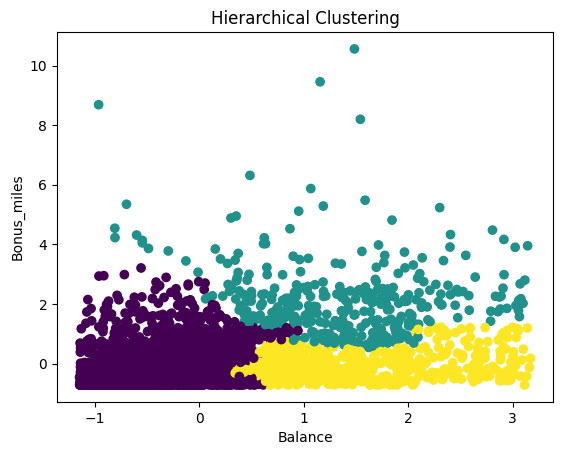

In [53]:
for cluster in df['hierarchical_cluster'].unique():
    cluster_data = df[df['hierarchical_cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(cluster_data[['Balance', 'Bonus_miles', 'Qual_miles']].describe())
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['hierarchical_cluster'])
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('Hierarchical Clustering')
plt.show()

Cluster 0:
           Balance  Bonus_miles   Qual_miles
count  3714.000000  3714.000000  3714.000000
mean     -0.006826    -0.029939    -0.001941
std       0.994765     0.900625     0.996523
min      -1.147029    -0.718521    -0.175597
25%      -0.775190    -0.668084    -0.175597
50%      -0.328391    -0.430570    -0.175597
75%       0.494397     0.271884    -0.175597
max       3.170658     4.539471    14.765868


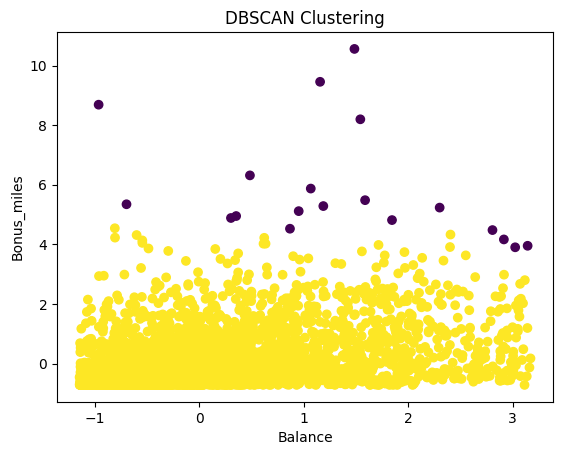

In [54]:
for cluster in df['dbscan_cluster'].unique():
    if cluster != -1:
        cluster_data = df[df['dbscan_cluster'] == cluster]
        print(f"Cluster {cluster}:")
        print(cluster_data[['Balance', 'Bonus_miles', 'Qual_miles']].describe())
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['dbscan_cluster'])
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('DBSCAN Clustering')
plt.show()

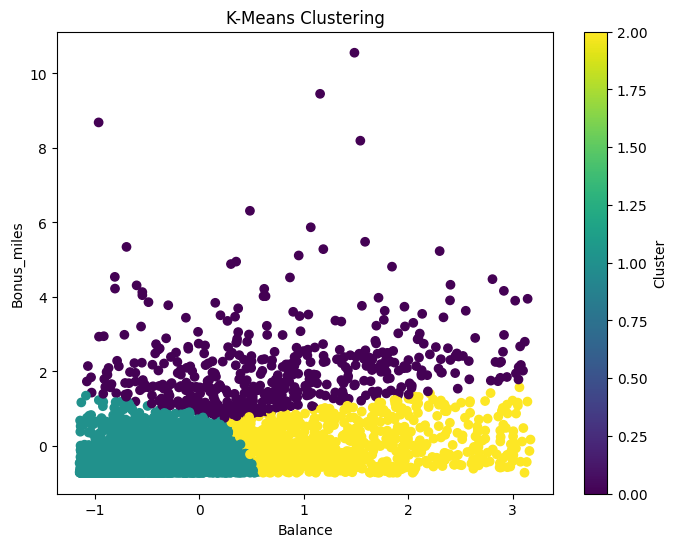

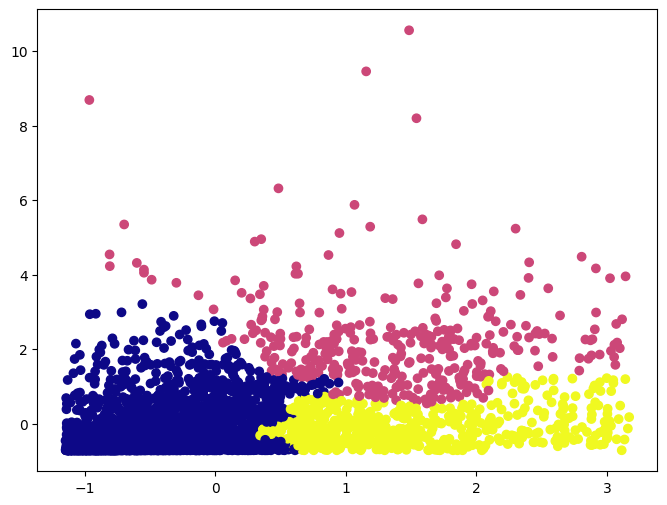

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['kmeans_cluster'], cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('Bonus_miles')
plt.title('K-Means Clustering')
plt.colorbar(label='Cluster')
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(df['Balance'], df['Bonus_miles'], c=df['hierarchical_cluster'], cmap='plasma')

In [57]:
from sklearn.metrics import silhouette_score
X = df[['Balance', 'Bonus_miles']]
kmeans_silhouette = silhouette_score(X, df['kmeans_cluster'])
print(f"Silhouette score for K-Means: {kmeans_silhouette}")
unique_clusters = df['dbscan_cluster'][df['dbscan_cluster'] != -1].unique()
if len(unique_clusters) >= 2:
    dbscan_silhouette = silhouette_score(X[df['dbscan_cluster'] != -1], df['dbscan_cluster'][df['dbscan_cluster'] != -1])
    print(f"Silhouette score for DBSCAN: {dbscan_silhouette}")
else:
    print("Silhouette score for DBSCAN cannot be calculated. There are less than 2 clusters after removing noise points.")

Silhouette score for K-Means: 0.5458201051973334
Silhouette score for DBSCAN cannot be calculated. There are less than 2 clusters after removing noise points.
